In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [7]:
passengers=pd.read_csv("/content/AirPassengers.csv")

In [8]:
passengers.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [9]:
new_columns = ['Date', 'Passengers']
passengers.columns = new_columns
passengers.head()

,Date,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [10]:
date_column = passengers['Date']
new_values = []
for value in date_column:
    new_value = value[:4]
    new_values.append(new_value)

passengers['Date'] = new_values
passengers.head()

,Date,Passengers
0,1949,112
1,1949,118
2,1949,132
3,1949,129
4,1949,121


In [11]:
groupby_passengers = passengers.groupby(by='Date').sum()

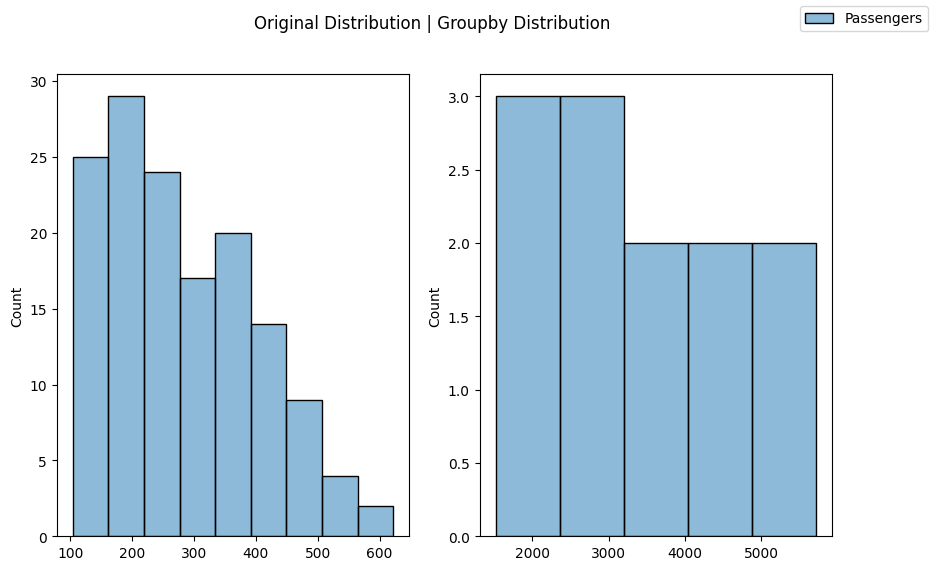

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
sns.histplot(data=passengers, ax=ax1, legend='')
sns.histplot(data=groupby_passengers, ax=ax2, legend='')
plt.suptitle('Original Distribution | Groupby Distribution')
fig.legend(['Passengers'])
plt.show()

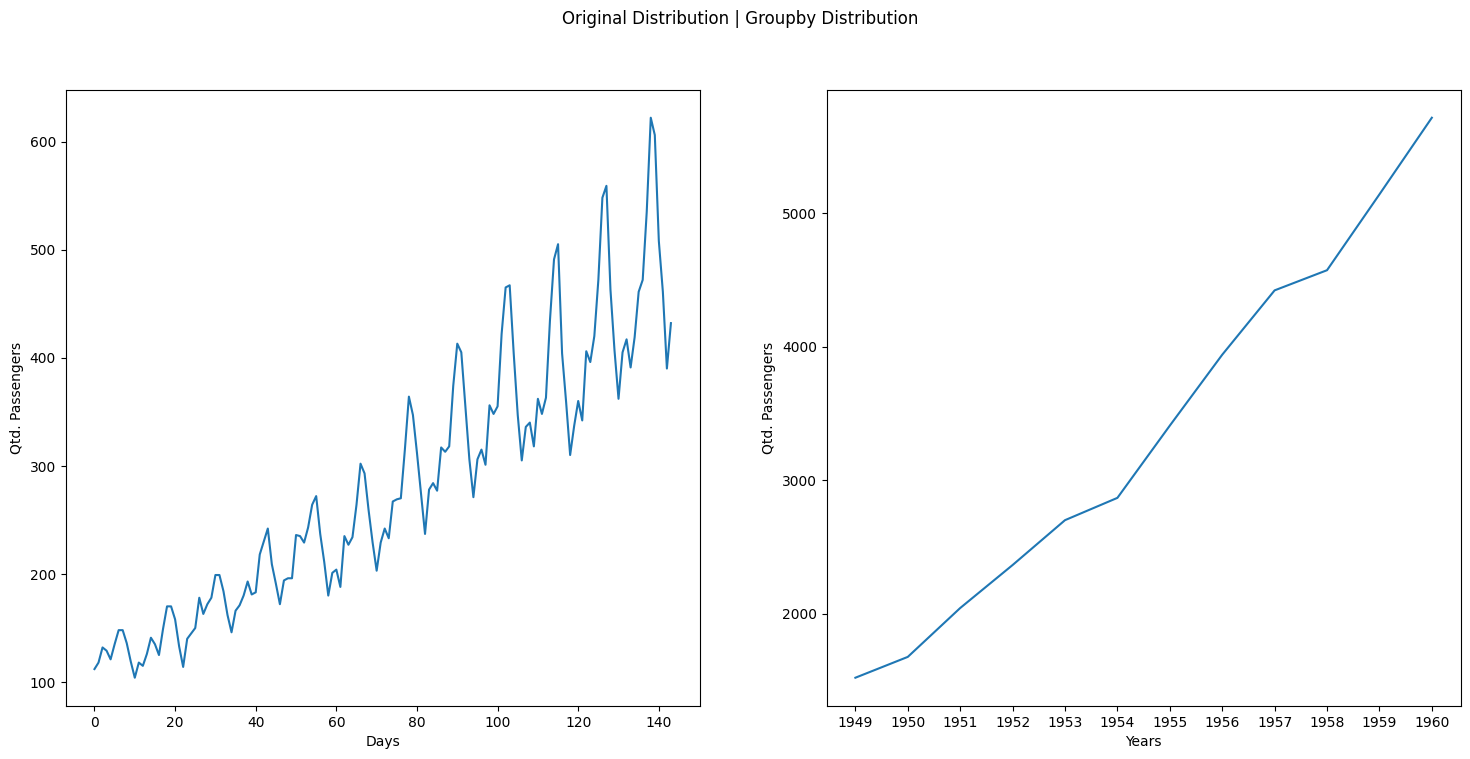

In [13]:
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
plt.suptitle('Original Distribution | Groupby Distribution')
ax1.plot(passengers['Passengers'])
ax1.set_xlabel('Days')
ax1.set_ylabel('Qtd. Passengers')
ax2.plot(groupby_passengers)
ax2.set_xlabel('Years')
ax2.set_ylabel('Qtd. Passengers')
plt.show()

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [15]:
x = groupby_passengers.index
x = np.array(x).reshape(-1, 1)

y = groupby_passengers['Passengers']

In [16]:
lm = LinearRegression()

In [17]:
lm.fit(x, y)

LinearRegression()

In [18]:
predict = lm.predict(x)

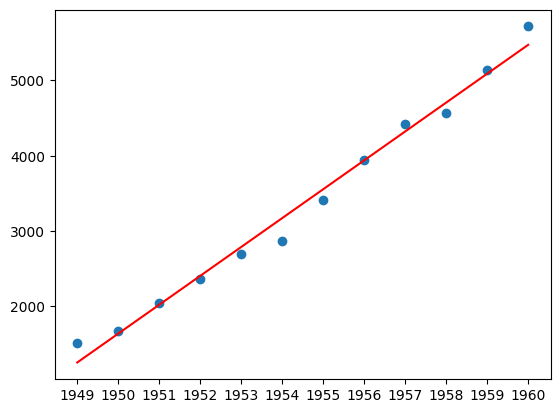

In [19]:
plt.scatter(groupby_passengers.index, y)
plt.plot(groupby_passengers.index, predict, color='r')
plt.show()

In [20]:
lm.score(x, y)

0.9866055381778157

In [21]:
lm.coef_[0]

383.0874125874125

In [22]:
lm.intercept_

-745380.7645687643

In [23]:
mse = mean_squared_error(y, predict)
rmse = np.sqrt(mse)
rmse

154.08704899323627

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [26]:
lr=LinearRegression()

In [27]:
lr.fit(x_train,y_train)

LinearRegression()

In [28]:
lr.score(x_test,y_test)

0.9841661756705099

In [29]:
lr.score(x_train,y_train)

0.9840275072122489